# Práctica de PNL con Python y Google Colab para n-gramas

Objetivo Analizar el texto de un libro y generar n-gramas para entender la estructura del lenguaje.

Requisitos

* Cuenta de Google Colab
* Conocimientos básicos de Python y PNL.
* Librerías necesarias: nltk, pandas, matplotlib

In [14]:
import nltk
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Cargar el texto del libro


In [20]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
texto_libro = response.text
texto = pd.DataFrame([texto_libro], columns=["texto"])



# Tokenizar el texto


In [23]:
tokens = nltk.word_tokenize(texto["texto"].iloc[0])

# Generar n-gramas

In [24]:

ngramas = list(ngrams(tokens, 2))  # 2-gramas

# Mostrar los 10 primeros n-gramas


In [25]:
print(list(ngramas)[:10])

[('*', '*'), ('*', '*'), ('*', 'START'), ('START', 'OF'), ('OF', 'THE'), ('THE', 'PROJECT'), ('PROJECT', 'GUTENBERG'), ('GUTENBERG', 'EBOOK'), ('EBOOK', '11'), ('11', '*')]


# Generar n-gramas de longitud 3

In [26]:

ngramas_3 = ngrams(tokens, 3)

# Mostrar los 10 primeros n-gramas de longitud 3


In [27]:
print(list(ngramas_3)[:10])

[('*', '*', '*'), ('*', '*', 'START'), ('*', 'START', 'OF'), ('START', 'OF', 'THE'), ('OF', 'THE', 'PROJECT'), ('THE', 'PROJECT', 'GUTENBERG'), ('PROJECT', 'GUTENBERG', 'EBOOK'), ('GUTENBERG', 'EBOOK', '11'), ('EBOOK', '11', '*'), ('11', '*', '*')]


# Gráfica de frecuencia de n-gramas


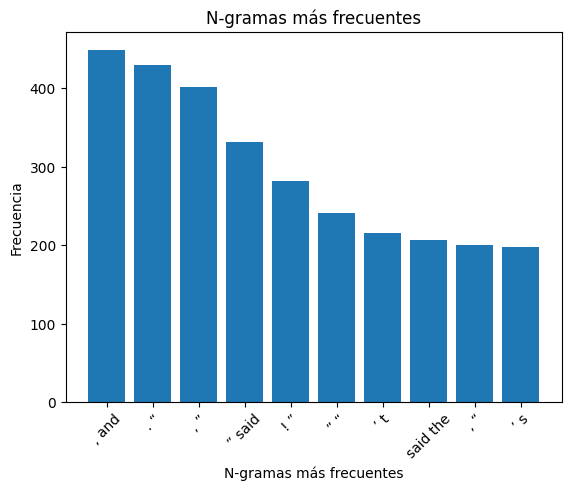

In [32]:

# Gráfica de frecuencia de n-gramas
freq_ngramas = nltk.FreqDist(ngramas)

ngramas_más_frecuentes = freq_ngramas.most_common(10)
plt.bar([' '.join(ngrama[0]) for ngrama in ngramas_más_frecuentes], [ngrama[1] for ngrama in ngramas_más_frecuentes])
plt.xlabel("N-gramas más frecuentes")
plt.ylabel("Frecuencia")
plt.title("N-gramas más frecuentes")
plt.xticks(rotation=45)
plt.show()



# Gráfica de distribución de frecuencias de n-gramas

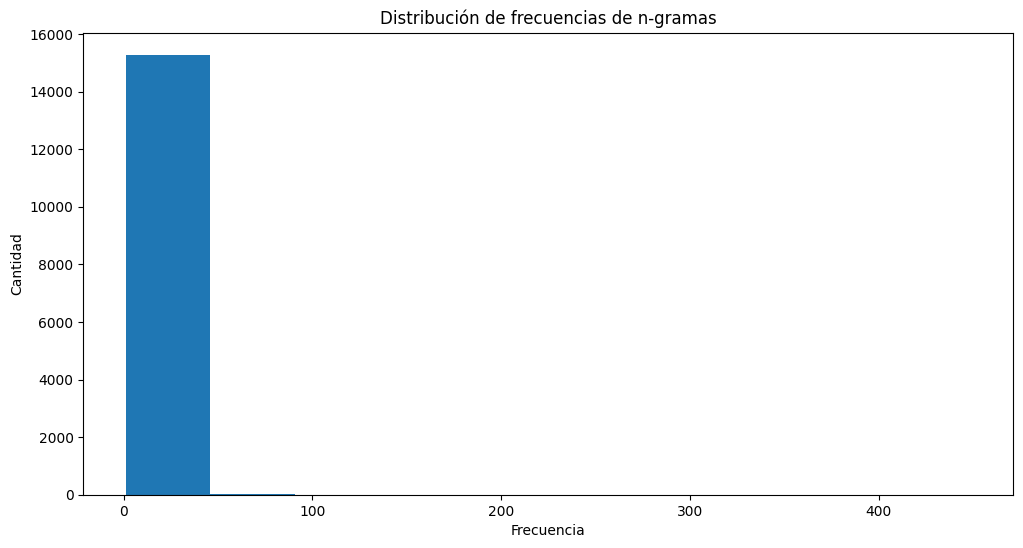

In [33]:
# Gráfica de distribución de frecuencias de n-gramas
plt.figure(figsize=(12, 6))
plt.hist(freq_ngramas.values(), bins=10)
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.title("Distribución de frecuencias de n-gramas")
plt.show()

# Gráfica de n-gramas más frecuentes


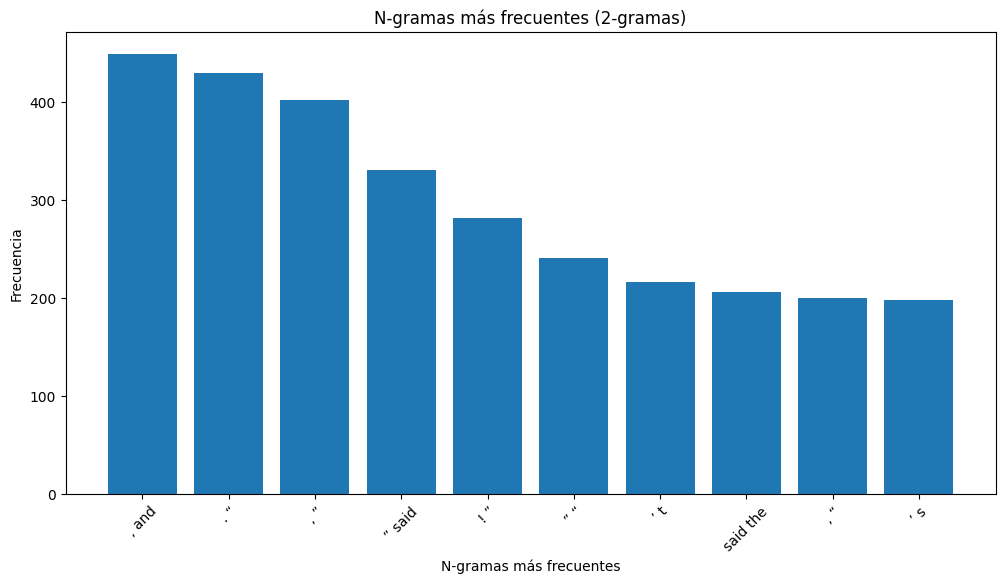

In [36]:
# Gráfica de n-gramas más frecuentes
ngramas_mas_frecuentes = freq_ngramas.most_common(10)
plt.figure(figsize=(12, 6))
plt.bar([' '.join(ng) for ng, _ in ngramas_mas_frecuentes], [count for _, count in ngramas_mas_frecuentes])
plt.xlabel("N-gramas más frecuentes")
plt.ylabel("Frecuencia")
plt.title("N-gramas más frecuentes (2-gramas)")
plt.xticks(rotation=45)
plt.show()